# 2.感知机

一种二类分类的线性分类模型,其输入为实例的特征向量，输出为示例的类别，取+1和-1二值。感知机对应于输入空间（特征空间）中将示例划分为正负二类的分离超平面，属于判别模型。

参考文献：
Rosenblatt, F. The perceptron: a probabilistic model for information storage and organization in the brain.[J]. Psychological Review, 1958, 65:386-408.

In [426]:
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [427]:
numpy.random.seed(42)

In [428]:
#%pprint

## 2.1感知器模型  y=sign(wx+b)

In [429]:
# 公式定义
def sign(x):
    if x>=0:
        return 1
    else:
        return -1
def perceptron(x,w,b):
    # print(w@x+b)
    y=sign(w@x+b)
    return y

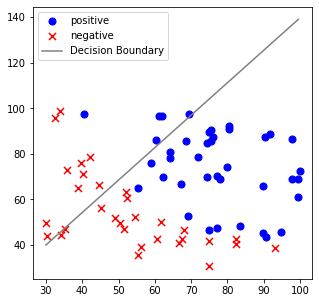

In [430]:
# 模型可视化
data_x = []
data_y = []
with open("data.txt","r",encoding="utf-8") as f:
    for line in f:
        line= line.strip().split(",")
        data_x.append([float(line[0]),float(line[1])])
        if line[2] == "0":
            data_y.append(int(-1))
        else:
            data_y.append(int(line[2]))
            
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.3)

positive = [x for x,y in zip(x_train,y_train) if y==1]
negative = [x for x,y in zip(x_train,y_train) if y==-1]

w = numpy.random.uniform(-0.5, 0.5, (2))
b = numpy.random.uniform(-1, 1)
# w,b
def create_image(positive,negative,w,b):
    x1 = numpy.arange(30, 100, 0.5)
    x2 = -(w[0]/w[1])*x1-(b/w[1])
    fig, ax = plt.subplots(figsize=(5, 5)) 
    ax.scatter([i[0] for i in positive], [i[1] for i in positive], s=50, c='b', marker='o', label='positive') 
    ax.scatter([i[0] for i in negative], [i[1] for i in negative], s=50, c='r', marker='x', label='negative') 
    ax.plot(x1, x2, label='Decision Boundary', c='grey') 
    ax.legend() 
    plt.show() 
create_image(positive,negative,w,b)

In [431]:
pre_list = []
for x in x_train:
    pre_list.append(perceptron(x,w,b))
pre_list

[-1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1]

# 感知器学习策略

## 样本到超平面距离计算

In [432]:
def distance(x,w,b):
    w_l2 = numpy.linalg.norm(w)
    d = abs(w@x+b)/w_l2
    return d

In [433]:
d_list = []
for x in x_train:
    d_list.append(distance(x,w,b))
d_list

[42.245725002282825, 28.634566093598846, 5.299586193987719, 20.16515952287232, 10.661033232477022, 2.975711552620799, 24.48808321215964, 29.30157441974909, 13.150982310666361, 24.66433253603162, 22.423366160673183, 9.522409799533808, 33.09218320505205, 38.97168420706115, 52.3532721165883, 34.104625426958386, 49.80135534561562, 9.210626241521144, 21.91626033468915, 0.9315674298986414, 22.587640263908234, 1.8931612030094889, 27.227007111697027, 35.76043389386747, 10.496295324562688, 23.490460460707308, 6.997619905641139, 3.185127786920806, 30.609530932470236, 6.364250316225666, 38.79439769464487, 8.201821167397773, 10.97542265856823, 42.51332739712724, 21.259974035630776, 8.787699111596664, 21.1357184630841, 11.221250071776444, 0.29605381227700855, 40.21036353605919, 41.18977831903858, 13.701368366830229, 19.08959519333912, 6.354429104164636, 6.422336990314767, 29.826097725309737, 38.565740180501585, 4.813199746387953, 45.9108649153955, 12.12555047387438, 5.460460355132562, 11.9566061705

In [434]:
def distance(x,w,b,y):
    w_l2 = numpy.linalg.norm(w)
    d = -y*(w@x+b)/w_l2
    return d

In [435]:
d_list = []
for x,y in zip(x_train,y_train):
    d_list.append(distance(x,w,b,y))
d_list

[-42.245725002282825, 28.634566093598846, 5.299586193987719, -20.16515952287232, 10.661033232477022, -2.975711552620799, -24.48808321215964, -29.30157441974909, -13.150982310666361, 24.66433253603162, 22.423366160673183, 9.522409799533808, 33.09218320505205, 38.97168420706115, -52.3532721165883, 34.104625426958386, 49.80135534561562, 9.210626241521144, -21.91626033468915, -0.9315674298986414, 22.587640263908234, -1.8931612030094889, -27.227007111697027, -35.76043389386747, 10.496295324562688, -23.490460460707308, -6.997619905641139, 3.185127786920806, 30.609530932470236, -6.364250316225666, 38.79439769464487, 8.201821167397773, -10.97542265856823, -42.51332739712724, 21.259974035630776, -8.787699111596664, 21.1357184630841, 11.221250071776444, -0.29605381227700855, 40.21036353605919, -41.18977831903858, -13.701368366830229, 19.08959519333912, -6.354429104164636, 6.422336990314767, 29.826097725309737, 38.565740180501585, -4.813199746387953, 45.9108649153955, 12.12555047387438, 5.4604603

## 计算经验损失

In [436]:
def loss_one(x,w,b,y):
    d = -y*(w@x+b)
    if d>0: return d 
    else: return 0

In [437]:
loss_one_list = []
for x,y in zip(x_train,y_train):
    loss_one_list.append(loss_one(x,w,b,y))
loss_one_list

[0, 10.535081377629666, 1.9497963279389188, 0, 3.9223521776663928, 0, 0, 0, 0, 9.074373592484736, 8.249888840323237, 3.5034357364211255, 12.175104797784513, 14.338260380919671, 0, 12.54759730083368, 18.322656944314545, 3.3887259431896295, 0, 0, 8.310327718291962, 0, 0, 0, 3.8617426590801847, 0, 0, 1.1718557328117294, 11.261700221004372, 0, 14.273034044702229, 3.0175716007310838, 0, 0, 7.8218596300550525, 0, 7.776144162807381, 4.128464258144443, 0, 14.793988869667377, 0, 0, 7.023345077779729, 0, 2.3628729908588477, 10.97346352957365, 14.188907555366512, 0, 16.8912878379246, 4.461169782467183, 2.0089843168079975, 4.3990126686377655, 1.6477690838344925, 2.6360257874781547, 0.7361325706652808, 17.51822514244277, 12.52032462836123, 5.191924526974419, 0, 3.0398335516305854, 8.164638148746416, 1.1079772355382422, 4.572219382987375, 5.620230724083197, 0, 4.000937526057181, 2.2142073764650254, 4.742848004296236, 0, 16.424670141994206]

In [438]:
#经验风险损失函数
def loss(data_x,data_y,w,b):
    l = 0
    for x,y in zip(x_train,y_train):
        l += loss_one(x,w,b,y)
    return l
print(loss(x_train,y_train,w,b))

326.8709699077731


# 感知机学习算法

##  原始形式

In [439]:
def grad_w(x,y,w,b):
    # print(x,y)
    d = -y*(w@x+b)
    # print(d)
    if d>0: return (y*numpy.sum(x))
    else: return 0
def grad_b(x,y,w,b):
    d = -y*(w@x+b)
    if d>0: return y
    else: return 0

In [440]:
# 求解过程
lr = 1
# print("loss",loss(data_x,data_y,w,b))
for i in range(10000):
    for x,y in zip(x_train,y_train):
        # print(w,b)
        # print(grad_w(x,y,w,b))
        # print(grad_b(x,y,w,b))
        w += (lr*grad_w(x,y,w,b))
        b += (lr*grad_b(x,y,w,b))
    # print("loss",loss(data_x,data_y,w,b))
    
    stop_condition = []

    for x,y in zip(x_test,y_test):
        stop_condition.append(True if sign(-y*(w@x+b))< 0 else  False)
    right_rate = sum(stop_condition)/len(stop_condition)
    if i %1000 ==0:
        print("loss",loss(x_train,y_train,w,b))
        print("right_rate",right_rate)
    if right_rate>0.9:
        print("end_right_rate:",right_rate)
        break

loss 324768.7159884749
right_rate 0.7
end_right_rate: 0.9333333333333333


In [441]:
# for x,y in zip(data_x,data_y):
#     print("----------------------")
#     print("x:",x)
#     print("perceptron:",perceptron(x,w,b))
#     print("true:",y)
#     print("----------------------")

##  对偶形式

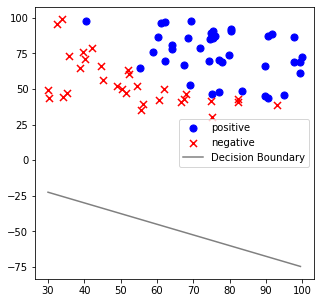

In [442]:
numpy.random.seed(5)
a = numpy.random.uniform(-0.5, 0.5, (len(x_train)))
b = numpy.random.uniform(-1, 1)
# a,b
# x_train@a*y_train

w = numpy.sum([numpy.dot(xi,ay) for ay,xi in zip(a*y_train,x_train)],axis=0)
create_image(positive,negative,w,b)

In [443]:
def grad_w(x,y,w,b):
    # print(x,y)
    d = -y*(w@x+b)
    # print(d)
    if d>=0: return 1
    else: return 0
def grad_b(x,y,w,b):
    d = -y*(w@x+b)
    if d>=0: return y
    else: return 0

In [ ]:
# 求解过程
lr = 1
# print("loss",loss(data_x,data_y,w,b))
for i in range(10000):
    n = 0 
    for x,y in zip(x_train,y_train):
        # print(w,b)
        # print(grad_w(x,y,w,b))
        # print(grad_b(x,y,w,b))
        a[n] += (lr*grad_w(x,y,w,b))
        b += (lr*grad_b(x,y,w,b))
        w = numpy.sum([numpy.dot(xi,ay) for ay,xi in zip(a*y_train,x_train)],axis=0)
        n+=1
    # print("loss",loss(data_x,data_y,w,b))
        
       
    stop_condition = []
    for x,y in zip(x_test,y_test):
        stop_condition.append(True if sign(-y*(w@x+b))< 0 else  False)
    right_rate = sum(stop_condition)/len(stop_condition)
    if i %1000 ==0:
        print("loss",loss(x_train,y_train,w,b))
        print("right_rate",right_rate)
    if right_rate>0.9:
        print("end_right_rate:",right_rate)
        break
   
   

loss 106906.90821216116
right_rate 0.7
loss 45504.81474484549
right_rate 0.5


## 参数输出，可视化

In [ ]:
print("w:",w)
print("b:",b)

In [ ]:
positive = [x for x,y in zip(x_train,y_train) if y==1]
negative = [x for x,y in zip(x_train,y_train) if y==-1] 
create_image(positive,negative,w,b)

In [ ]:
positive = [x for x,y in zip(x_test,y_test) if y==1]
negative = [x for x,y in zip(x_test,y_test) if y==-1]
create_image(positive,negative,w,b)